# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
#installing citipy
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559704 sha256=483996b5bc316de14ae56ca8872ecb87af1c68ab4ce300fcd127e18c4e24bfa2
  Stored in directory: c:\users\seraf\appdata\local\pip\cache\wheels\eb\07\14\1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\seraf\anaconda3\envs\PythonData\python.exe -m pip install --upgrade pip' command.


In [25]:
# imports and setups
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from scipy import stats
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key
from citipy import citipy

#output
output_data_file = "Output_Data/cities.csv"

#Ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)     
# Print the city count to confirm sufficient count
print(cities)
len(cities)

['shingu', 'ponta do sol', 'cherskiy', 'nikolskoye', 'kruisfontein', 'port alfred', 'naze', 'lebu', 'cidreira', 'puerto ayora', 'busselton', 'mandan', 'rikitea', 'aklavik', 'genhe', 'ushuaia', 'college', 'saint-philippe', 'alice springs', 'handan', 'chokurdakh', 'mys shmidta', 'marawi', 'adrar', 'biak', 'sitka', 'severo-kurilsk', 'taolanaro', 'bredasdorp', 'mataura', 'sentyabrskiy', 'albany', 'hermanus', 'jamestown', 'faanui', 'iracoubo', 'butaritari', 'moose factory', 'vaini', 'svetlyy', 'ambilobe', 'pevek', 'castro', 'ubala', 'isangel', 'barrow', 'riom', 'fairbanks', 'thompson', 'pio xii', 'leningradskiy', 'ancud', 'gimli', 'santa cruz', 'ruyigi', 'golyshmanovo', 'cape town', 'iqaluit', 'bagdarin', 'saskylakh', 'mar del plata', 'hobart', 'poronaysk', 'belushya guba', 'riyadh', 'clovis', 'tuktoyaktuk', 'jiaojiang', 'mosetse', 'airai', 'carnarvon', 'esperance', 'alofi', 'san patricio', 'chifeng', 'hervey bay', 'aniva', 'nanortalik', 'luanda', 'reconquista', 'grand river south east', 'd

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# save url information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [28]:
# create list to hold data
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [29]:
#Print
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------") 

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : shingu
Processing Record 2 of Set 1 : ponta do sol
Processing Record 3 of Set 1 : cherskiy
Processing Record 4 of Set 1 : nikolskoye
Processing Record 5 of Set 1 : kruisfontein
Processing Record 6 of Set 1 : port alfred
Processing Record 7 of Set 1 : naze
Processing Record 8 of Set 1 : lebu
Processing Record 9 of Set 1 : cidreira
Processing Record 10 of Set 1 : puerto ayora
Processing Record 11 of Set 1 : busselton
Processing Record 12 of Set 1 : mandan
Processing Record 13 of Set 1 : rikitea
Processing Record 14 of Set 1 : aklavik
Processing Record 15 of Set 1 : genhe
Processing Record 16 of Set 1 : ushuaia
Processing Record 17 of Set 1 : college
Processing Record 18 of Set 1 : saint-philippe
Processing Record 19 of Set 1 : alice springs
Processing Record 20 of Set 1 : handan
Processing Record 21 of Set 1 : chokurdakh
City not found. Skipping...
Processing Record 22 of Set 1 : marawi
Processing Reco

Processing Record 39 of Set 4 : kodiak
Processing Record 40 of Set 4 : didwana
Processing Record 41 of Set 4 : provideniya
Processing Record 42 of Set 4 : cine
City not found. Skipping...
Processing Record 43 of Set 4 : mahebourg
Processing Record 44 of Set 4 : tiksi
Processing Record 45 of Set 4 : yellowknife
Processing Record 46 of Set 4 : bertoua
Processing Record 47 of Set 4 : chuy
Processing Record 48 of Set 4 : okha
City not found. Skipping...
City not found. Skipping...
Processing Record 49 of Set 4 : hofn
Processing Record 50 of Set 4 : esso
Processing Record 0 of Set 5 : la gomera
Processing Record 1 of Set 5 : brooks
Processing Record 2 of Set 5 : waddan
Processing Record 3 of Set 5 : katakwi
City not found. Skipping...
Processing Record 4 of Set 5 : surt
Processing Record 5 of Set 5 : pisco
Processing Record 6 of Set 5 : tarauaca
Processing Record 7 of Set 5 : port elizabeth
City not found. Skipping...
Processing Record 8 of Set 5 : chase
Processing Record 9 of Set 5 : gizo


Processing Record 22 of Set 8 : dalvik
Processing Record 23 of Set 8 : kloulklubed
Processing Record 24 of Set 8 : charters towers
Processing Record 25 of Set 8 : korla
Processing Record 26 of Set 8 : bathsheba
Processing Record 27 of Set 8 : bonavista
Processing Record 28 of Set 8 : dingle
Processing Record 29 of Set 8 : hit
Processing Record 30 of Set 8 : bogovarovo
Processing Record 31 of Set 8 : lamar
Processing Record 32 of Set 8 : morgaushi
Processing Record 33 of Set 8 : cascais
Processing Record 34 of Set 8 : mufulira
Processing Record 35 of Set 8 : porto santo
Processing Record 36 of Set 8 : cayambe
Processing Record 37 of Set 8 : russell
Processing Record 38 of Set 8 : san juan del sur
Processing Record 39 of Set 8 : slave lake
Processing Record 40 of Set 8 : hihya
Processing Record 41 of Set 8 : nacala
Processing Record 42 of Set 8 : salvador
Processing Record 43 of Set 8 : caravelas
Processing Record 44 of Set 8 : cabo san lucas
Processing Record 45 of Set 8 : velyka oleksa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
#DataFrame
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [32]:
#count
weather_dict.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [33]:
#df print
weather_dict.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Shingū,75,JP,1603066873,87,33.73,135.98,60.80,2.24
1,Ponta do Sol,75,PT,1603066873,88,32.67,-17.10,73.40,29.97
2,Cherskiy,95,RU,1603066873,92,68.75,161.30,23.09,6.82
3,Nikolskoye,90,RU,1603066874,93,59.70,30.79,36.00,2.24
4,Kruisfontein,33,ZA,1603066874,90,-34.00,24.73,52.00,3.22


In [36]:
# Save city data into a csv file
weather_dict.describe().to_csv("Output_Data/cities.csv", index = False)

In [37]:
weather_dict.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,565.000000,5.650000e+02,565.000000,565.000000,565.000000,565.000000,565.000000
mean,54.191150,1.603067e+09,74.240708,19.361876,16.623646,59.281487,7.825752
std,37.623917,8.518757e+01,20.272228,33.808001,91.478244,20.513194,5.623196
min,0.000000,1.603066e+09,7.000000,-54.800000,-175.200000,6.690000,0.220000
25%,20.000000,1.603067e+09,66.000000,-8.840000,-65.710000,41.860000,3.440000
50%,63.000000,1.603067e+09,79.000000,24.690000,20.260000,63.900000,6.710000
75%,90.000000,1.603067e+09,89.000000,47.890000,103.110000,77.340000,10.290000
max,100.000000,1.603067e+09,100.000000,78.220000,179.320000,95.000000,44.960000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
weather_dict.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,565.000000,5.650000e+02,565.000000,565.000000,565.000000,565.000000,565.000000
mean,54.191150,1.603067e+09,74.240708,19.361876,16.623646,59.281487,7.825752
std,37.623917,8.518757e+01,20.272228,33.808001,91.478244,20.513194,5.623196
min,0.000000,1.603066e+09,7.000000,-54.800000,-175.200000,6.690000,0.220000
25%,20.000000,1.603067e+09,66.000000,-8.840000,-65.710000,41.860000,3.440000
50%,63.000000,1.603067e+09,79.000000,24.690000,20.260000,63.900000,6.710000
75%,90.000000,1.603067e+09,89.000000,47.890000,103.110000,77.340000,10.290000
max,100.000000,1.603067e+09,100.000000,78.220000,179.320000,95.000000,44.960000


In [39]:
#  Get the indices of cities that have humidity over 100%.
indicies = weather_dict[weather_dict['Humidity']>100].index
indicies

Int64Index([], dtype='int64')

In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_dict = weather_dict.drop(indicies,inplace=False)
clean_weather_dict.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Shingū,75,JP,1603066873,87,33.73,135.98,60.80,2.24
1,Ponta do Sol,75,PT,1603066873,88,32.67,-17.10,73.40,29.97
2,Cherskiy,95,RU,1603066873,92,68.75,161.30,23.09,6.82
3,Nikolskoye,90,RU,1603066874,93,59.70,30.79,36.00,2.24
4,Kruisfontein,33,ZA,1603066874,90,-34.00,24.73,52.00,3.22


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The temperatues increase as you get closer to the 0 latitude, the temps decrease the further away you are from the 0 latitude


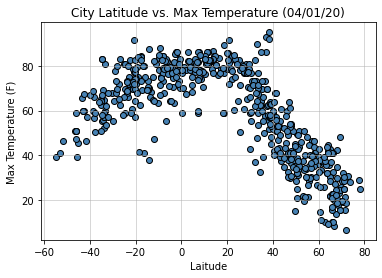

In [43]:
# Scatter plot - Lat vs Temp
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Title
plt.title("City Latitude vs. Max Temperature (04/01/20)")

# X-axis label
plt.xlabel("Laitude")

# Y-axis label
plt.ylabel("Max Temperature (F)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

print("The temperatues increase as you get closer to the 0 latitude, the temps decrease the further away you are from the 0 latitude")

## Latitude vs. Humidity Plot

Humidity seems to stay around the 80% mark for a majority of the latitudes, however, Polar regions do seem to have lower humidity %


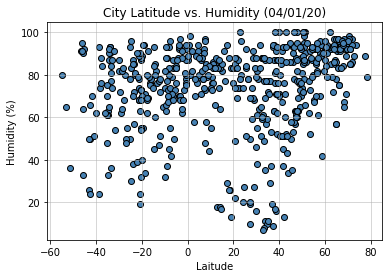

In [45]:
# Scatter plot - Lat vs Humidity
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Title
plt.title("City Latitude vs. Humidity (04/01/20)")

# X-axis label
plt.xlabel("Laitude")

# Y-axis label
plt.ylabel("Humidity (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")
print("Humidity seems to stay around the 80% mark for a majority of the latitudes, however, Polar regions do seem to have lower humidity %")

## Latitude vs. Cloudiness Plot

Cloudiness seems to be widespread, no real pattern seen, just follows latitude in a liniar manner


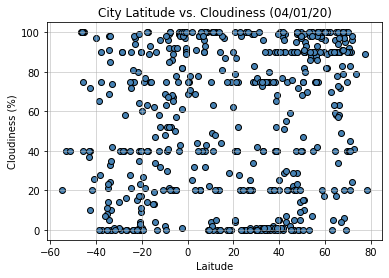

In [47]:
# Scatter plot - Lat vs Cloudiness
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Title
plt.title("City Latitude vs. Cloudiness (04/01/20)")

# X-axis label
plt.xlabel("Laitude")

# Y-axis label
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")
print("Cloudiness seems to be widespread, no real pattern seen, just follows latitude in a liniar manner")

## Latitude vs. Wind Speed Plot

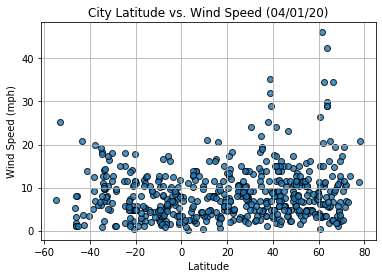

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


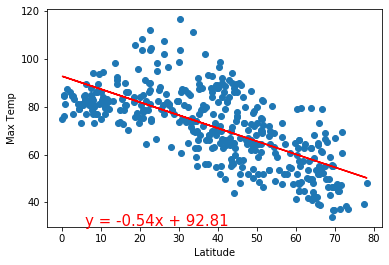

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


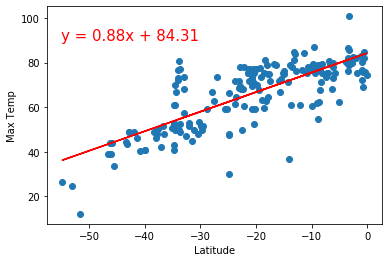

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


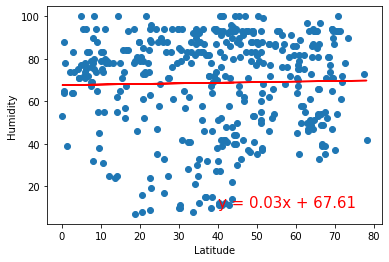

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


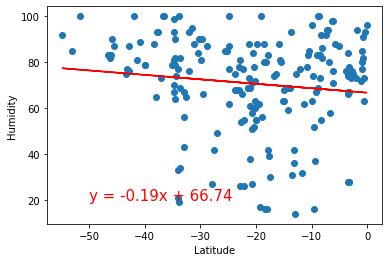

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


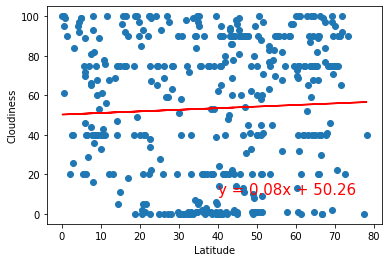

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


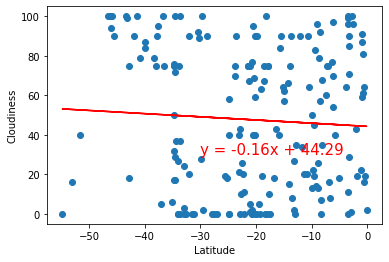

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


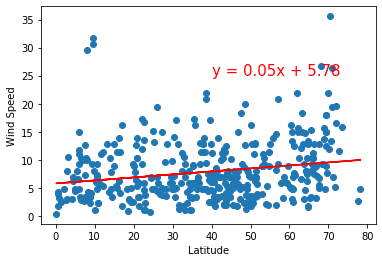

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


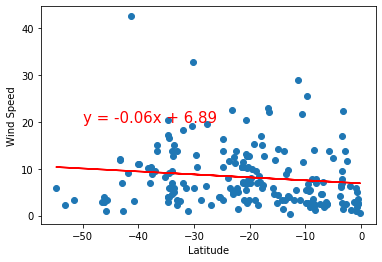